In [1]:
!pip install torch


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install pandas

     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     - -------------------------------------- 0.6/11.6 MB 12.0 MB/s eta 0:00:01
     ---- ----------------------------------- 1.4/11.6 MB 14.6 MB/s eta 0:00:01
     ------- -------------------------------- 2.2/11.6 MB 15.7 MB/s eta 0:00:01
     --------- ------------------------------ 2.7/11.6 MB 17.1 MB/s eta 0:00:01
     ------------ --------------------------- 3.7/11.6 MB 17.1 MB/s eta 0:00:01
     --------------- ------------------------ 4.5/11.6 MB 17.1 MB/s eta 0:00:01
     ----------------- ---------------------- 4.9/11.6 MB 15.8 MB/s eta 0:00:01
     ------------------- -------------------- 5.7/11.6 MB 15.8 MB/s eta 0:00:01
     ---------------------- ----------------- 6.5/11.6 MB 16.0 MB/s eta 0:00:01
     ------------------------ --------------- 7.2/11.6 MB 16.0 MB/s eta 0:00:01
     -------------------------- ------------- 7.8/11.6 MB 16.1 MB/s eta 0:00:01
     ------------------------------ --------- 8.


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

Then is necessary to import the Iris plant dataset:

In [3]:
# Getting dataset
data = pd.read_csv('iris.csv')

split_data = 100
X_train = torch.tensor(data.iloc[:split_data, :-1].values, dtype=torch.float32)

iris_types = {
    1: 'Setosa',
    2: 'Versicolor',
    3: 'Virginica'
}

keys = list(iris_types.keys())
y_train = torch.tensor([1 if data.iloc[i, -1] == iris_types[1] else 0 for i in range(split_data)], dtype=torch.float32)
y_train

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
'''class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        
        torch.manual_seed(0)
        
        self.weights = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.biases = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return torch.sigmoid(self.weights * x + self.biases)'''

In [17]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, X_train):
        super(LogisticRegression, self).__init__()
        self.X_train = X_train
        
        self.weights = torch.nn.Parameter(torch.randn(4, 1, requires_grad=True, dtype=torch.float32))
        self.biases = torch.nn.Parameter(torch.randn(100, 1, requires_grad=True, dtype=torch.float32))

    def forward(self) -> torch.Tensor:
        return torch.sigmoid(torch.matmul(self.X_train, self.weights) + self.biases)

In [18]:
# Prediction step
model = LogisticRegression(X_train)

with torch.inference_mode():
    y_pred = model.forward()

torch.transpose(y_pred, 0, 1)

tensor([[0.9921, 0.9967, 0.9811, 0.9572, 0.9941, 0.9946, 0.9794, 0.9947, 0.9826,
         0.9885, 0.9907, 0.9787, 0.9734, 0.9809, 0.9987, 0.9989, 0.9930, 0.9984,
         0.9982, 0.9524, 0.9774, 0.9946, 0.9962, 0.9780, 0.9980, 0.9850, 0.9838,
         0.9956, 0.9858, 0.9878, 0.9584, 0.9966, 0.9986, 0.9844, 0.9849, 0.9602,
         0.9277, 0.9843, 0.9758, 0.9883, 0.9945, 0.9068, 0.9729, 0.9464, 0.9945,
         0.9780, 0.9947, 0.9924, 0.9854, 0.9651, 0.9968, 0.9919, 0.9961, 0.9814,
         0.9963, 0.9958, 0.9941, 0.9906, 0.9914, 0.9924, 0.9789, 0.9872, 0.9632,
         0.9917, 0.9949, 0.9892, 0.9996, 0.9905, 0.9398, 0.9967, 0.9962, 0.9845,
         0.9700, 0.9929, 0.9938, 0.9949, 0.9830, 0.9889, 0.9964, 0.9951, 0.9915,
         0.8946, 0.9914, 0.9958, 0.9973, 0.9857, 0.9931, 0.9876, 0.9951, 0.9937,
         0.9548, 0.9909, 0.9983, 0.9774, 0.9966, 0.9949, 0.9926, 0.9945, 0.9894,
         0.9621]])

In [19]:
# Defining the loss function
loss = torch.nn.L1Loss()

# defininig the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [20]:
# Time to train the model
n_epochs = 1000
loss_values = []
epoch_count = []

for epoch in range(n_epochs):
    
    model.train()
    
    # Computing predictions
    y_pred = model.forward()
    
    # Computing loss function
    output = loss(y_pred, y_train.view(-1, 1))
    
    # Zeroing the gradients for the next epoch
    optimizer.zero_grad()
    
    # Computing the backpropagation step
    output.backward()
    
    # Updating the weights by using the optimizer
    optimizer.step()
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(output.item())
        print(f'Epoch {epoch} | Loss: {output.item()}')             # Printing the loss function tells us how much the model is predicts correctly
    

Epoch 0 | Loss: 0.5023501515388489
Epoch 10 | Loss: 0.5019545555114746
Epoch 20 | Loss: 0.5015627145767212
Epoch 30 | Loss: 0.501147449016571
Epoch 40 | Loss: 0.5006710290908813
Epoch 50 | Loss: 0.5000701546669006
Epoch 60 | Loss: 0.4992217719554901
Epoch 70 | Loss: 0.4978376626968384
Epoch 80 | Loss: 0.495066374540329
Epoch 90 | Loss: 0.4872032105922699
Epoch 100 | Loss: 0.4404483437538147
Epoch 110 | Loss: 0.27750107645988464
Epoch 120 | Loss: 0.23283597826957703
Epoch 130 | Loss: 0.19830819964408875
Epoch 140 | Loss: 0.1707983762025833
Epoch 150 | Loss: 0.1487998217344284
Epoch 160 | Loss: 0.13105343282222748
Epoch 170 | Loss: 0.11658096313476562
Epoch 180 | Loss: 0.10464323312044144
Epoch 190 | Loss: 0.09468590468168259
Epoch 200 | Loss: 0.08629236370325089
Epoch 210 | Loss: 0.07914719730615616
Epoch 220 | Loss: 0.0730094164609909
Epoch 230 | Loss: 0.06769295036792755
Epoch 240 | Loss: 0.06305260956287384
Epoch 250 | Loss: 0.05897388979792595
Epoch 260 | Loss: 0.05536569654941559
E

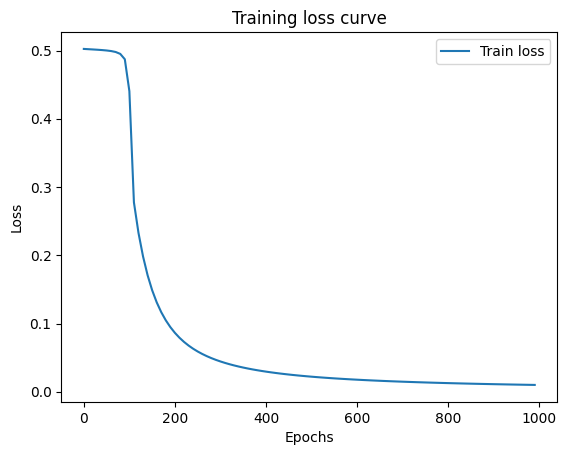

In [21]:
# Plotting the loss function
plt.plot(epoch_count, loss_values, label="Train loss")
plt.title("Training loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [23]:
torch.transpose(y_pred, 0, 1), y_train

(tensor([[9.9782e-01, 9.9792e-01, 9.9375e-01, 9.6926e-01, 9.9860e-01, 9.9735e-01,
          9.9203e-01, 9.9763e-01, 9.8690e-01, 9.9272e-01, 9.9751e-01, 9.8675e-01,
          9.8582e-01, 9.9583e-01, 9.9992e-01, 9.9988e-01, 9.9906e-01, 9.9948e-01,
          9.9910e-01, 9.8725e-01, 9.8210e-01, 9.9803e-01, 9.9974e-01, 9.6895e-01,
          9.9658e-01, 9.8298e-01, 9.8710e-01, 9.9834e-01, 9.9552e-01, 9.8935e-01,
          9.6039e-01, 9.9810e-01, 9.9982e-01, 9.9864e-01, 9.8914e-01, 9.9081e-01,
          9.8628e-01, 9.9671e-01, 9.8873e-01, 9.9483e-01, 9.9874e-01, 8.7454e-01,
          9.9074e-01, 9.5453e-01, 9.9376e-01, 9.8467e-01, 9.9825e-01, 9.9647e-01,
          9.9607e-01, 9.8697e-01, 3.4000e-03, 2.1309e-03, 1.0922e-03, 1.3379e-03,
          1.8069e-03, 2.6326e-03, 1.5561e-03, 3.9350e-02, 1.2161e-03, 7.1284e-03,
          5.2567e-03, 2.4620e-03, 9.0709e-04, 7.5299e-04, 4.2553e-02, 2.2368e-03,
          2.7946e-02, 5.5085e-03, 5.4853e-05, 1.8446e-02, 1.0787e-03, 3.8040e-03,
          5.0251